* [1. Data Exploration](#1.-Data-Exploration)
    * [1.1. Distribution of Independent Variables](#1.1.-Distribution-of-Independent-Variables)
        * [1.1.1. Categorical Attributes](#1.1.1.-Categorical-Attributes)
        * [1.1.2. Numerical Attributes](#1.1.2.-Numerical-Attributes)
* [2. Preprocessing](#2.-Preprocessing)
    * [2.1. Correlation Matrix](#2.1.-Correlation-Matrix)
* [3. Building and Tuning Models](#3.-Building-and-Tuning-Models)
    * [3.1. Random Forest](#3.1.-Random-Forest)
        * [3.1.1. Feature Importance](#3.1.1.-Feature-Importance)
    * [3.2. k-Neaerst Neighbor](#3.2.-k-Nearest-Neighbor)
    * [3.3. Naive Bayes](#3.3.-Naive-Bayes)
    * [3.4. Logistic Regression](#3.4.-Logistic-Regression)
    * [3.5. Support Vector Machine](#3.5.-Support-Vector-Machine)
    * [3.6. Decision Tree](#3.6.-Decision-Tree)
    * [3.7. AdaBoost](#3.7.-AdaBoost)
    * [3.8. Gradient Boosting](#3.8.-Gradient-Boosting)
    * [3.9. XGBoost](#3.9.-XGBoost)
    * [3.10. Multi-Layer Perceptron](#3.10.-Multi-Layer-Perceptron)
* [4. Apply Models to Testing Set](#4.-Apply-Models-to-Testing-Set)
    * [4.1. Random Forest](#4.1.-Random-Forest)
    * [4.2. k-Neaerst Neighbor](#4.2.-k-Nearest-Neighbor)
    * [4.3. Naive Bayes](#4.3.-Naive-Bayes)
    * [4.4. Logistic Regression](#4.4.-Logistic-Regression)
    * [4.5. Support Vector Machine](#4.5.-Support-Vector-Machine)
    * [4.6. Decision Tree](#4.6.-Decision-Tree)
    * [4.7. AdaBoost](#4.7.-AdaBoost)
    * [4.8. Gradient Boosting](#4.8.-Gradient-Boosting)
    * [4.9. XGBoost](#4.9.-XGBoost)
    * [4.10. Multi-Layer Perceptron](#4.10.-Multi-Layer-Perceptron)
* [5. Results](#5.-Results)
    * [5.1. Performance Metrics](#5.1.-Performance-Metrics)
    * [5.2. Confusion Matrices](#5.2.-Confusion-Matrices)
    * [5.3. Receiver Operating Characteristic Curves](#5.3.-Receiver-Operating-Characteristic-Curves)
    * [5.4. Precision Recall Curves](#5.4.-Precision-Recall-Curves)

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import ensemble, neighbors, naive_bayes, linear_model, svm, tree, neural_network
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,
roc_curve, roc_auc_score, precision_recall_curve, average_precision_score)
import xgboost as xgb
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_context('notebook')

# 1. Data Exploration

In [2]:
# load datasets
train_file = os.path.join('C:/Users/Ivan/Documents/Datasets', 'churn-bigml-80.csv')
test_file = os.path.join('C:/Users/Ivan/Documents/Datasets', 'churn-bigml-20.csv')
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

# examine the head of the data
train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# examine shape of the data sets
print(train.shape)
print(test.shape)

(2666, 20)
(667, 20)


In [4]:
# check class distribution
print(train['Churn'].value_counts())
print(test['Churn'].value_counts())

False    2278
True      388
Name: Churn, dtype: int64
False    572
True      95
Name: Churn, dtype: int64


Due to the high class imbalance, a precision recall curve will provide a better indication of model performance than a ROC curve, since we are mainly interested in the classifier's ability to correctly predict the minority class(Churn=True).

In [5]:
# check for null values
print(train.isnull().values.any())
print(test.isnull().values.any())

False
False


In [6]:
# check datatype of columns
train.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [7]:
# get the number of unique values in training set
train.nunique()

State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls            21
Total intl charge          158
Customer service calls      10
Churn                        2
dtype: int64

In [8]:
# get stat summary for numeric attributes
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00


* Customer service calls is extremely skewed, the values range from 0-9 but it has a median of 1.
* Likewise for Number of vmail messages, ranging from 0-51 with a median of 0.

Since both of the above attributes contain a narrow range of integers, it might be worthwhile to look at their value count.

In [9]:
train['Customer service calls'].value_counts()

1    945
2    608
0    555
3    348
4    133
5     49
6     17
7      8
9      2
8      1
Name: Customer service calls, dtype: int64

In [10]:
train['Number vmail messages'].value_counts().head(10)

0     1933
31      50
28      42
29      39
24      37
33      37
30      35
27      34
25      33
32      33
Name: Number vmail messages, dtype: int64

As expected, both attributes are highly unbalanced, with over 70% of instances containing 0 vmail messages

## 1.1. Distribution of Independent Variables

### 1.1.1. Categorical Attributes

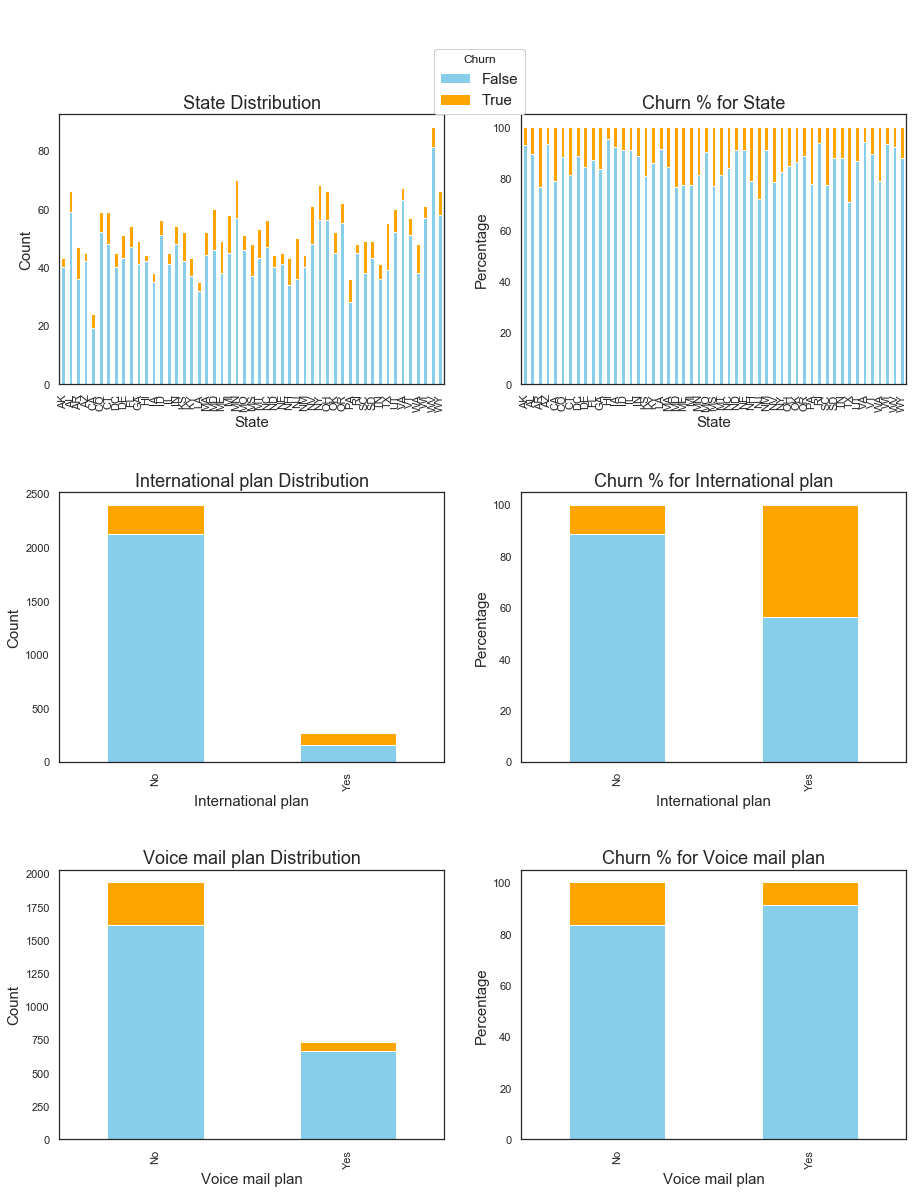

In [11]:
# examine the relationship between the categorical attributes and churn rate using stacked bar charts
cat = train.dtypes[train.dtypes=='object'].index

# configure subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))
plt.subplots_adjust(left=0.06, right=0.9, bottom=0.01, top=0.9, wspace=0.2, hspace=0.4)

for x in range(len(cat)):
    group = train.groupby([cat[x], 'Churn']).size().unstack()
    churn_percent = group.T/group.T.sum()*100

    ax = group.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=axes[x, 0], legend=None)       
    ax.set_title('{} Distribution'.format(cat[x]), fontsize=18)
    ax.set_xlabel(xlabel=cat[x], fontsize=15)
    ax.set_ylabel(ylabel='Count', fontsize=15)
        
    ax = churn_percent.T.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=axes[x, 1], legend=None)
    ax.set_title('Churn % for {}'.format(cat[x]), fontsize=18)
    ax.set_xlabel(xlabel=cat[x], fontsize=15)
    ax.set_ylabel(ylabel='Percentage', fontsize=15)
    
    fig.legend(['False', 'True'], title='Churn', bbox_to_anchor=(0.528, 1.00), fontsize=15)

* Churn % is considerably higher where International plan is Yes. However, this attribute is highly unbalanced. Customers with international plans make up for just over 10% of the total customers.

### 1.1.2. Numerical Attributes

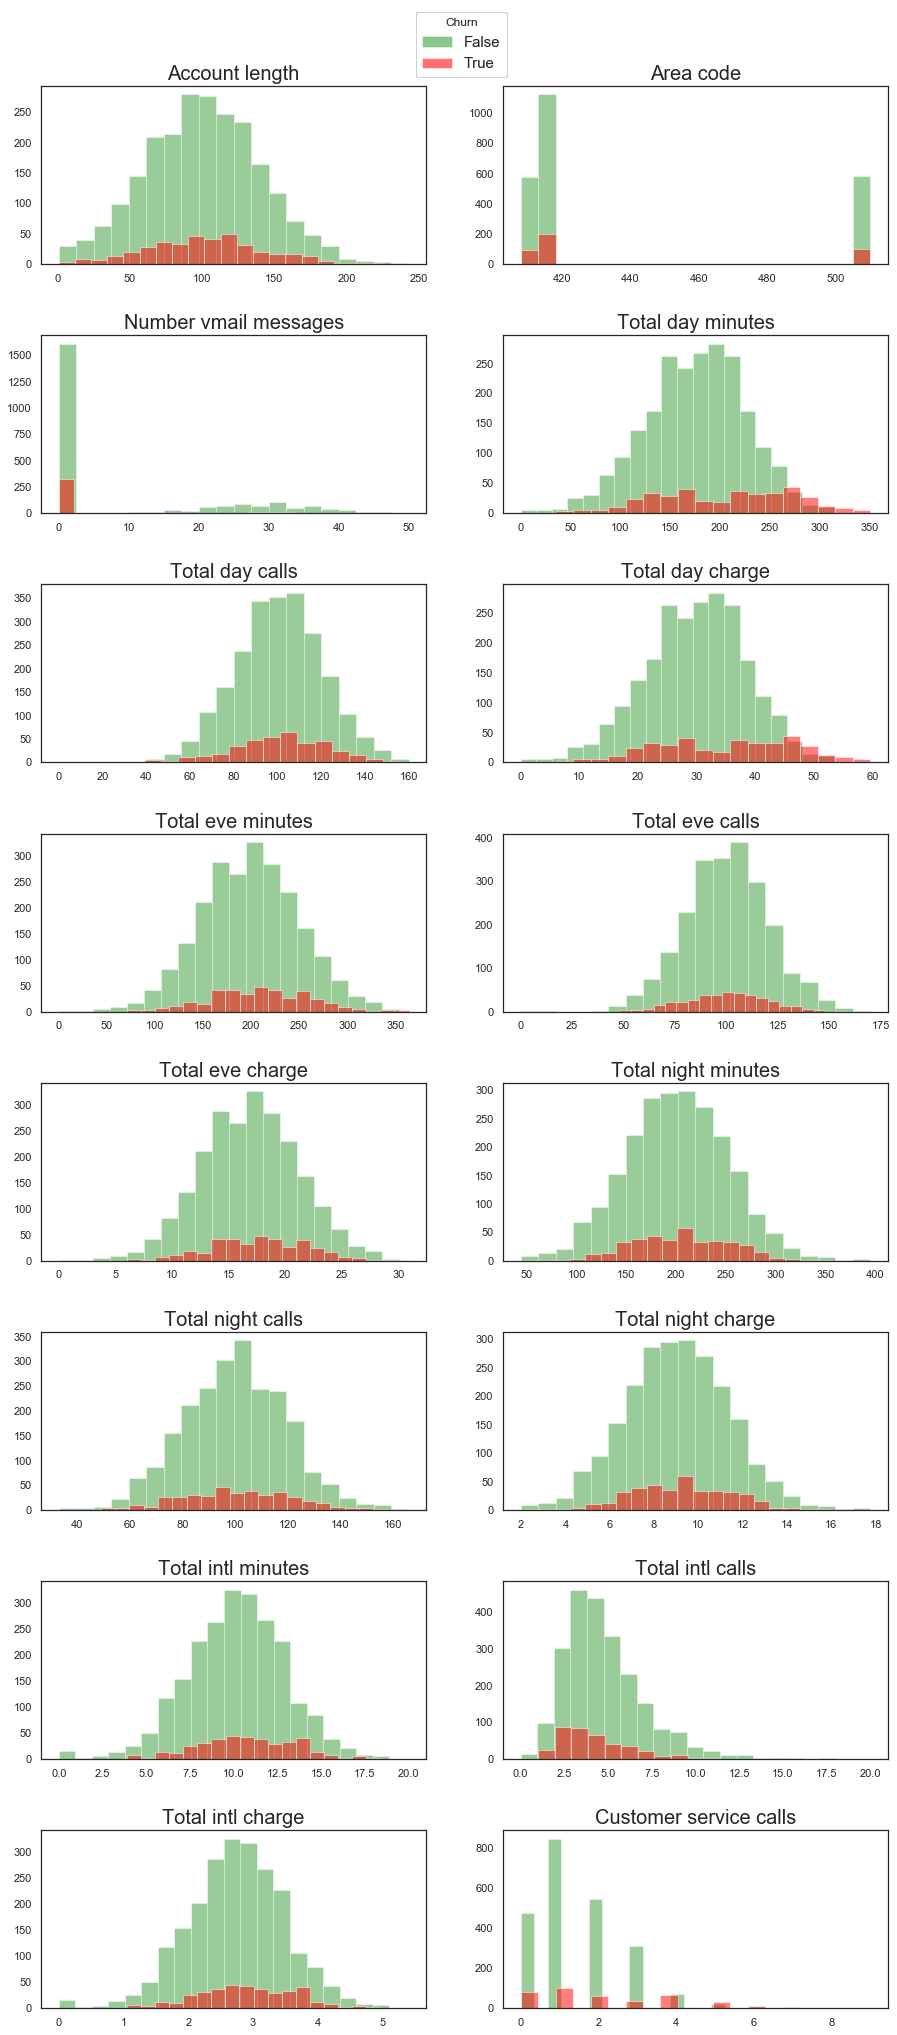

In [12]:
# examine the distribution of continous attributes in relation to churn rate using histograms
num = train.dtypes[train.dtypes!='object'].drop('Churn').index

churned_train = train[train['Churn']==True]
not_churned_train = train[train['Churn']==False]

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(14, 30))
plt.subplots_adjust(left=0.06, right=0.9, bottom=0.01, top=0.9, wspace=0.2, hspace=0.4)
row = 0

for x in range(0, len(num), 2):
    axes[row, 0].hist(not_churned_train.loc[:, num[x]], bins=20, color='green', alpha=0.4)
    axes[row, 0].hist(churned_train.loc[:, num[x]], bins=20, color='red',alpha=0.5)
    axes[row, 0].set_title(num[x], fontsize=20)
    
    axes[row, 1].hist(not_churned_train.loc[:, num[x+1]], bins=20, color='green', alpha=0.4)
    axes[row, 1].hist(churned_train.loc[:, num[x+1]], bins=20, color='red',alpha=0.5)
    axes[row, 1].set_title(num[x+1], fontsize=20)
    
    row+=1
    
    fig.legend(['False', 'True'], title='Churn', bbox_to_anchor=(0.51, 0.94), fontsize=15)


* The distribution of the 'Total _ charge' are identical to the corresponding 'Total _ minutes'.
* There is a noticeable increase in churn rate once customer service calls exceeds 3.
* Higher day call minutes also has influence on the churn rate.

# 2. Preprocessing

## 2.1. Correlation Matrix

Categorical values must be transformed into numericals. 
* 'International plan', 'Voice mail plan' and 'Churn' are all binary attributes, they can be transformed using label encoding.
* 'State' has 51 unique values, and are not ordinal, label encoding is unsuitable, so one hot encoding will be used.

In [13]:
# transform categorical attributes
train['International plan'].replace(['No', 'Yes'], [0, 1], inplace=True)
train['Voice mail plan'].replace(['No', 'Yes'], [0, 1], inplace=True)
train['Churn'].replace([False, True], [0, 1], inplace=True)

test['International plan'].replace(['No', 'Yes'], [0, 1], inplace=True)
test['Voice mail plan'].replace(['No', 'Yes'], [0, 1], inplace=True)
test['Churn'].replace([False, True], [0, 1], inplace=True)

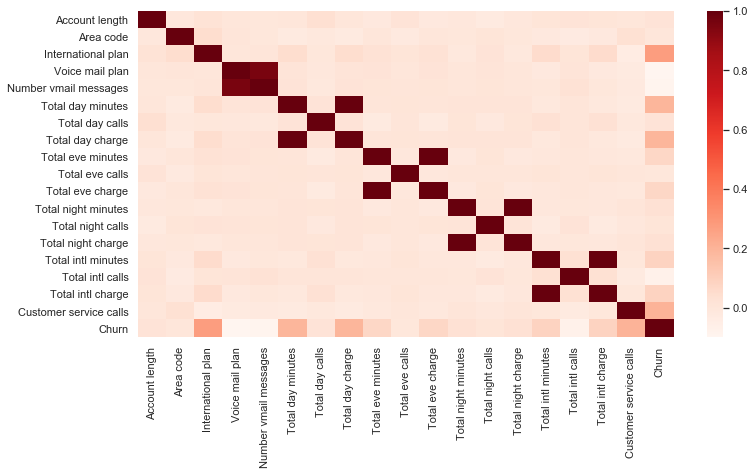

In [14]:
# find correlation between attributes
corr = train.corr()

plt.rcParams["figure.figsize"] = [12,6]
corr_heatmap = sns.heatmap(corr, cmap="Reds")

As expected, the 'Total _ minutes' and 'Total _ charges' attributes are highly correlated. As are 'Voice mail plan' and 'Number vmail messages'.

Beyond that, the independent attributes show very little correlation to each other.

In [15]:
# drop redundant attributes
train.drop(columns=['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'Voice mail plan'], 
           inplace=True)
test.drop(columns=['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'Voice mail plan'], 
           inplace=True)

### Principle Components Analysis

In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train.drop(columns=['Churn', 'State']))

pca = PCA()
principle_comps = pca.fit_transform(scaled_data)

print(pca.explained_variance_ratio_[:10])

[0.08672852 0.08401991 0.08149197 0.07929079 0.07776912 0.07713119
 0.07639577 0.07551207 0.07485624 0.07402708]


Give how the independent attributes are largely uncorrelated, none of the principle components generated by PCA are able to retain more than 9% of the total variance, severely limiting the usefulness of PCA for this dataset.

In [17]:
# get one-hot encoding of 'State'
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# move 'Churn' to last column
train_churn = train['Churn']
train = train.drop(columns='Churn')
train['Churn'] = train_churn

test_churn = test['Churn']
test = test.drop(columns='Churn')
test['Churn'] = test_churn

print(train.columns)
print(test.columns)

Index(['Account length', 'Area code', 'International plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total eve minutes', 'Total eve calls', 'Total night minutes',
       'Total night calls', 'Total intl minutes', 'Total intl calls',
       'Customer service calls', 'State_AK', 'State_AL', 'State_AR',
       'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL',
       'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD',
       'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT',
       'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM',
       'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA',
       'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT',
       'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY',
       'Churn'],
      dtyp

# 3. Building and Tuning Models

### Splitting training set into training and validation set

In [18]:
# split into training and testing sets using 80/20 split
x_train, x_val, y_train, y_val = train_test_split(train.drop(columns='Churn'), train['Churn'], train_size=0.8, random_state=100)

x_test = test.drop(columns='Churn')
y_test = test['Churn']

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(2132, 64)
(2132,)
(534, 64)
(534,)
(667, 64)
(667,)


In [19]:
# generate scaled versions of datasets for algorithm where it is necessary
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_val_scaled = pd.DataFrame(scaler.fit_transform(x_val), columns=x_val.columns)
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

In [20]:
train_accs = {}
train_precision = {}
train_recall = {}
train_f1score = {}
train_conf_mat = {}
train_roc_param = {}
train_prc_param = {}
test_accs = {}
test_precision = {}
test_recall = {}
test_f1score= {}
test_conf_mat = {}
test_roc_param = {}
test_prc_param = {}

def store_results(model_name, dataset, accuracy, precision, recall, f1score, conf_mat, roc_param, prc_param):
    if dataset=='train':
        train_accs[model_name] = accuracy
        train_precision[model_name] = precision
        train_recall[model_name] = recall
        train_f1score[model_name] = f1score
        train_conf_mat[model_name] = conf_mat
        train_roc_param[model_name] = roc_param
        train_prc_param[model_name] = prc_param
    else:
        test_accs[model_name] = accuracy
        test_precision[model_name] = precision
        test_recall[model_name] = recall
        test_f1score[model_name] = f1score
        test_conf_mat[model_name] = conf_mat
        test_roc_param[model_name] = roc_param
        test_prc_param[model_name] = prc_param

def get_prediction(model, data, labels):
    predicted = model.predict(data)
        
    accuracy = accuracy_score(labels, predicted)
    precision = precision_score(labels, predicted)
    recall = recall_score(labels, predicted)
    f1score = f1_score(labels, predicted)
    class_report = classification_report(labels.values, predicted)
    
    print('Accuracy: {}\n\nClassification Report:\n{}\n'.format(accuracy, class_report))
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[15, 3])
    plt.subplots_adjust(left=0.06, right=0.9, bottom=0.01, top=0.95, wspace=0.4, hspace=0.4)
    conf_matrix = pd.DataFrame(confusion_matrix(labels, predicted), columns=['False', 'True'], index=['False', True])
    conf_heatmap = sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu', fmt='g', ax=axes[0])
    axes[0].set_title('Confusion Matrix', fontsize=15)
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')
    
    pred_proba = model.predict_proba(data)
    
    fpr, tpr, thresholds_roc = roc_curve(labels, pred_proba[:, 1])
    roc_auc = roc_auc_score(labels, pred_proba[:, 1]) 
    
    precision_c, recall_c, thresholds_prc = precision_recall_curve(labels, pred_proba[:, 1])
    avg_prec_score = average_precision_score(labels, pred_proba[:, 1])
    prc_line = len(labels[labels==1])/len(labels)
    
    axes[1].plot(fpr, tpr, label='AUC={:.3f}'.format(roc_auc))
    axes[1].plot([0,1], [0,1], linestyle="dotted", color="black")
    axes[1].set_title('ROC Curve', fontsize=15)
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_xticks(np.arange(0, 1, 0.2))
    axes[1].set_yticks(np.arange(0, 1, 0.2))
    axes[1].legend(loc="lower right")
    
    axes[2].plot(recall_c, precision_c, label='AP={:.3f}'.format(avg_prec_score))
    axes[2].plot([0,1], [prc_line,prc_line], linestyle="dotted", color="black")
    axes[2].set_title('Precision Recall Curve', fontsize=15)
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')
    axes[2].set_xticks(np.arange(0, 1, 0.2))
    axes[2].set_yticks(np.arange(0, 1, 0.2))
    axes[2].legend(loc = "lower left")
    
    # save results for training and testing set
    if len(labels)==len(x_train):
        store_results(type(model).__name__, 'train', accuracy, precision, recall, f1score, conf_matrix,
                      [fpr, tpr, thresholds_roc, roc_auc], [recall_c, precision_c, thresholds_prc, avg_prec_score, prc_line])
    elif len(labels)==len(x_test):
        store_results(type(model).__name__, 'test', accuracy, precision, recall, f1score, conf_matrix,
                      [fpr, tpr, thresholds_roc, roc_auc], [recall_c, precision_c, thresholds_prc, avg_prec_score, prc_line])

## 3.1. Random Forest

Accuracy: 0.9699812382739212

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1835
           1       1.00      0.78      0.88       297

    accuracy                           0.97      2132
   macro avg       0.98      0.89      0.93      2132
weighted avg       0.97      0.97      0.97      2132




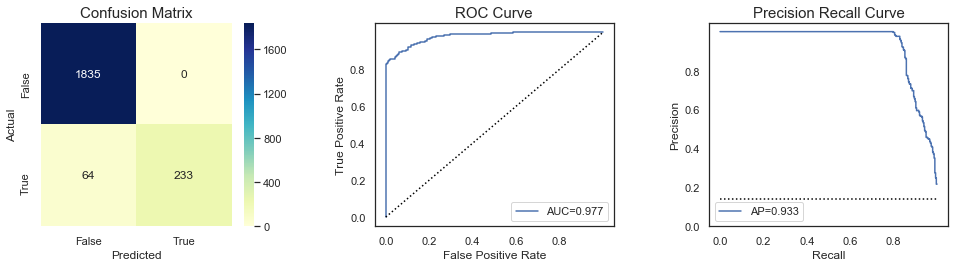

In [21]:
# instantiate random forest model
rf_model = ensemble.RandomForestClassifier(n_estimators=100, min_samples_split=18, max_features=0.4, n_jobs=-1, 
                                           max_depth=8, random_state=42)
rf_model.fit(x_train, y_train)

# measure the performance of the model on validation set
get_prediction(rf_model, x_train, y_train)

Accuracy: 0.9269662921348315

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       443
           1       0.92      0.63      0.75        91

    accuracy                           0.93       534
   macro avg       0.92      0.81      0.85       534
weighted avg       0.93      0.93      0.92       534




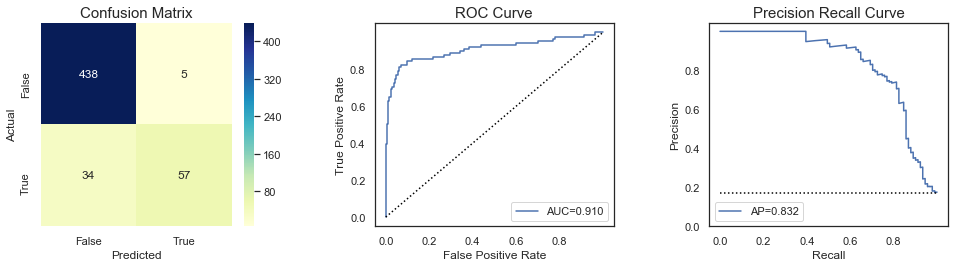

In [22]:
# measure the performance of the model on validation set
get_prediction(rf_model, x_val, y_val)

### 3.1.1. Feature Importance

In [23]:
feature_imp = pd.Series(rf_model.feature_importances_,index=x_train.columns).sort_values(ascending=False)

feature_imp.head(20)

Total day minutes         0.285654
Customer service calls    0.148358
International plan        0.143440
Total eve minutes         0.096775
Total intl minutes        0.072978
Total intl calls          0.072929
Number vmail messages     0.041316
Total night minutes       0.028607
Total day calls           0.017736
Total night calls         0.013733
Account length            0.013318
Total eve calls           0.012935
State_TX                  0.002815
State_NY                  0.002639
State_CT                  0.002401
State_MS                  0.002191
State_MD                  0.002143
State_AR                  0.001930
Area code                 0.001926
State_IN                  0.001771
dtype: float64

'Area code' and the States attributes all have values of less than 0.01.

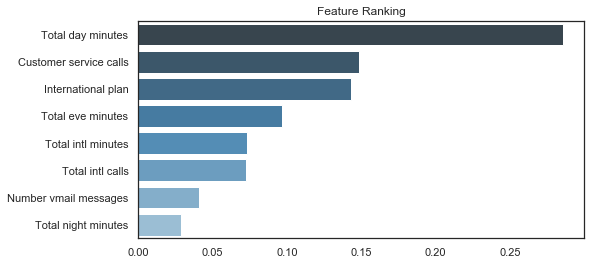

In [24]:
# generate a feature ranking chart without the location attributes
most_imp = feature_imp[feature_imp>0.02]

plt.rcParams["figure.figsize"] = [8,4]
feature_rank_plot = sns.barplot(x=most_imp.values, y=most_imp.index, palette='Blues_d').set_title('Feature Ranking')

### Rebuilding the Model with New Features

Accuracy: 0.975140712945591

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1835
           1       1.00      0.82      0.90       297

    accuracy                           0.98      2132
   macro avg       0.98      0.91      0.94      2132
weighted avg       0.98      0.98      0.97      2132




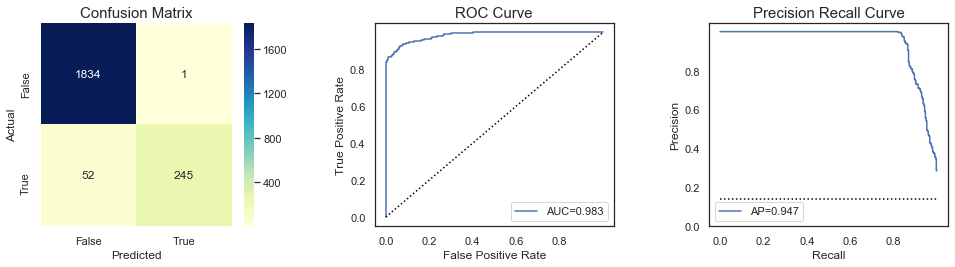

In [25]:
# eliminate the 'Area code' and the States attributes
x_train = x_train[most_imp.index]
x_val = x_val[most_imp.index]
x_test = x_test[most_imp.index]

x_train_scaled = x_train_scaled[most_imp.index]
x_val_scaled = x_val_scaled[most_imp.index]
x_test_scaled = x_test_scaled[most_imp.index]

# retrain model
rf_model = ensemble.RandomForestClassifier(n_estimators=100, min_samples_split=6, min_samples_leaf=3, max_depth=8,
                                           max_features=0.5, n_jobs=-1, random_state=42)
rf_model.fit(x_train, y_train)

get_prediction(rf_model, x_train, y_train)

Accuracy: 0.9325842696629213

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       443
           1       0.91      0.67      0.77        91

    accuracy                           0.93       534
   macro avg       0.92      0.83      0.87       534
weighted avg       0.93      0.93      0.93       534




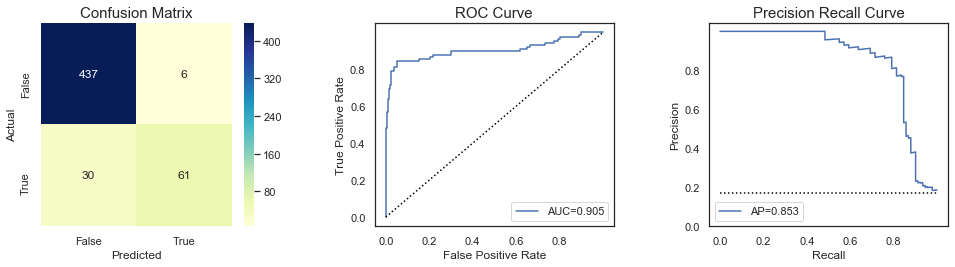

In [26]:
# measure the performance of the model on validation set
get_prediction(rf_model, x_val, y_val)

## 3.2. k-Nearest Neighbor

In [27]:
# Use GridSearch to find optimal hyper parameters
params = {'n_neighbors': [1, 3, 5, 7, 9], 'metric': ['euclidean', 'cityblock']}
grid = GridSearchCV(estimator=neighbors.KNeighborsClassifier(), param_grid=params, cv=5)
grid.fit(x_train_scaled, y_train)

print('Best score: {}'.format(grid.best_score_))
print('Best no. of neighbor: {}'.format(grid.best_estimator_.n_neighbors))
print('Best metric: {}'.format(grid.best_estimator_.metric))

Best score: 0.9146408505678881
Best no. of neighbor: 7
Best metric: cityblock


Accuracy: 0.9333958724202627

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1835
           1       0.94      0.56      0.70       297

    accuracy                           0.93      2132
   macro avg       0.94      0.78      0.83      2132
weighted avg       0.93      0.93      0.93      2132




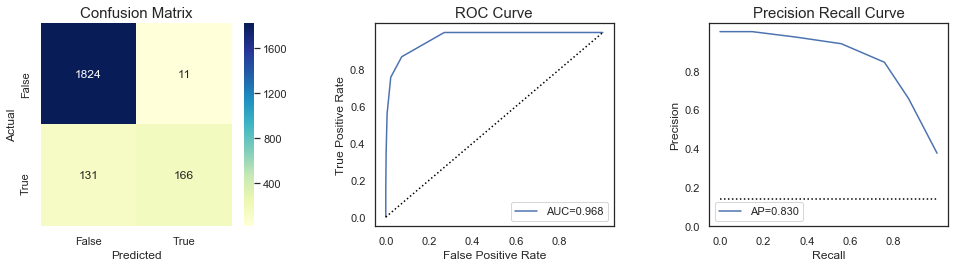

In [28]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=7,metric='cityblock')
knn_model.fit(x_train_scaled, y_train)

get_prediction(knn_model, x_train_scaled, y_train)

Accuracy: 0.8801498127340824

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       443
           1       0.83      0.37      0.52        91

    accuracy                           0.88       534
   macro avg       0.86      0.68      0.72       534
weighted avg       0.87      0.88      0.86       534




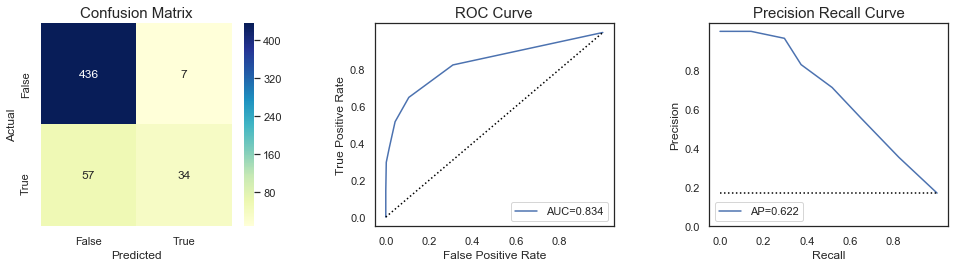

In [29]:
# measure the performance of the model on validation set
get_prediction(knn_model, x_val_scaled, y_val)

### 3.3. Naive Bayes

Accuracy: 0.8545966228893058

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1835
           1       0.48      0.43      0.45       297

    accuracy                           0.85      2132
   macro avg       0.69      0.68      0.68      2132
weighted avg       0.85      0.85      0.85      2132




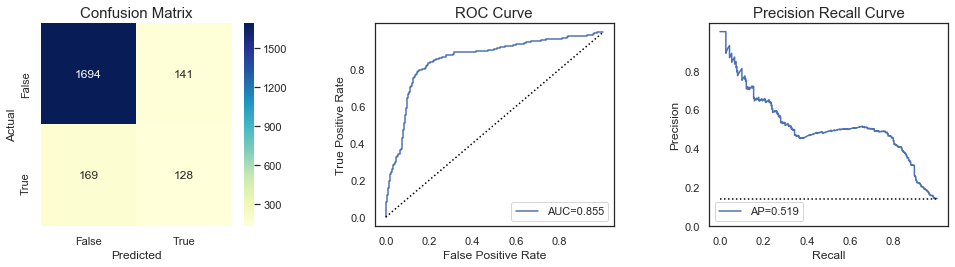

In [30]:
nb_model = naive_bayes.GaussianNB()
nb_model.fit(x_train, y_train)

get_prediction(nb_model, x_train, y_train)

Accuracy: 0.8277153558052435

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       443
           1       0.49      0.37      0.43        91

    accuracy                           0.83       534
   macro avg       0.69      0.65      0.66       534
weighted avg       0.81      0.83      0.82       534




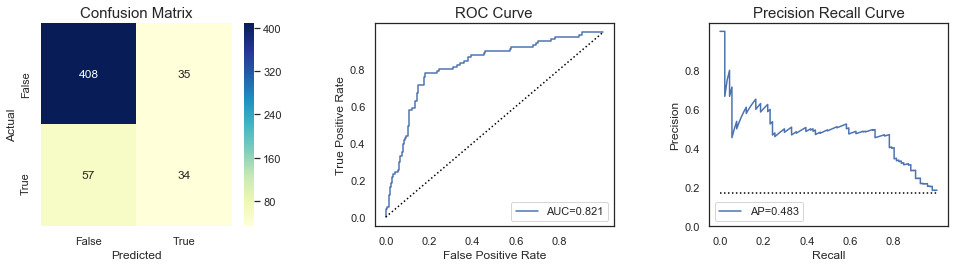

In [31]:
# measure the performance of the model on validation set
get_prediction(nb_model, x_val, y_val)

## 3.4. Logistic Regression

In [32]:
# Use GridSearch to find optimal hyper parameters
params = {'solver': ['liblinear'], 'penalty':['l1', 'l2'], 'C':[0.01, 0.1, 1, 10]}
grid = GridSearchCV(estimator=linear_model.LogisticRegression(), param_grid=params, cv=5, n_jobs=-1)
grid.fit(x_train_scaled, y_train)

print('Best score: {}'.format(grid.best_score_))
print('Best penalty: {}'.format(grid.best_estimator_.penalty))
print('Best C: {}'.format(grid.best_estimator_.C))

Best score: 0.8700893887917669
Best penalty: l2
Best C: 1


Accuracy: 0.8681988742964353

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1835
           1       0.57      0.22      0.32       297

    accuracy                           0.87      2132
   macro avg       0.73      0.60      0.62      2132
weighted avg       0.84      0.87      0.84      2132




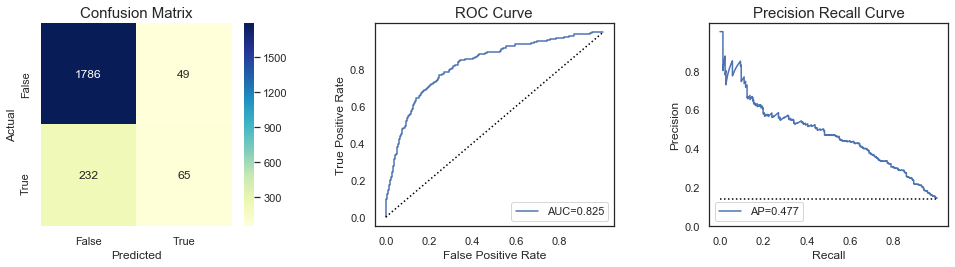

In [33]:
lr_model = linear_model.LogisticRegression(solver='liblinear', penalty='l2', C=1)
lr_model.fit(x_train_scaled, y_train)

get_prediction(lr_model, x_train_scaled, y_train)

Accuracy: 0.848314606741573

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       443
           1       0.68      0.21      0.32        91

    accuracy                           0.85       534
   macro avg       0.77      0.59      0.62       534
weighted avg       0.83      0.85      0.81       534




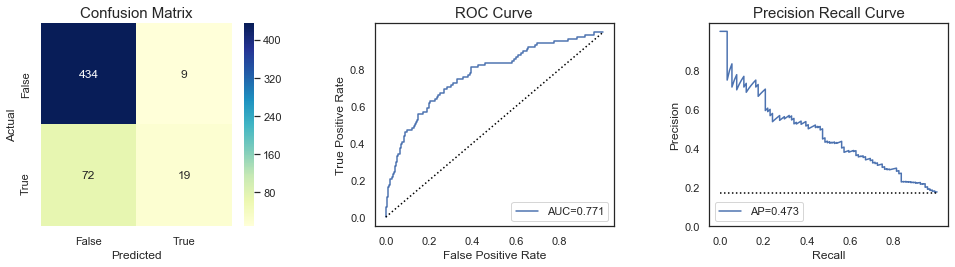

In [34]:
# measure the performance of the model on validation set
get_prediction(lr_model, x_val_scaled, y_val)

In [35]:
# weights applied to each feature
lr_model.coef_

array([[ 0.69835982,  0.6347378 ,  0.65593696,  0.27428801,  0.31764672,
        -0.39804304, -0.33622089,  0.08166672]])

In [36]:
# the bias added to the decision function
lr_model.intercept_

array([-2.35037453])

## 3.5. Support Vector Machine

In [37]:
# Use GridSearch to find optimal hyper parameters
params = {'kernel': ['rbf'], 'gamma': [0.001, 0.01, 1], 'C':[1, 10, 100, 1000]}
grid = GridSearchCV(estimator=svm.SVC(), param_grid=params, cv=5, n_jobs=-1)
grid.fit(x_train_scaled, y_train)

print('Best score: {}'.format(grid.best_score_))
print('Best gamma: {}'.format(grid.best_estimator_.gamma))
print('Best C: {}'.format(grid.best_estimator_.C))

Best score: 0.9348132510912469
Best gamma: 0.01
Best C: 1000


Accuracy: 0.9615384615384616

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1835
           1       0.96      0.75      0.85       297

    accuracy                           0.96      2132
   macro avg       0.96      0.87      0.91      2132
weighted avg       0.96      0.96      0.96      2132




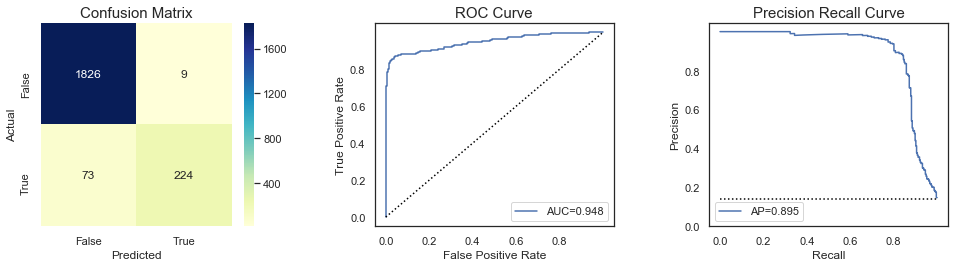

In [38]:
svm_model = svm.SVC(kernel='rbf', gamma=0.01, C=1000, probability=True)
svm_model.fit(x_train_scaled, y_train)

get_prediction(svm_model, x_train_scaled, y_train)

Accuracy: 0.9082397003745318

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       443
           1       0.84      0.57      0.68        91

    accuracy                           0.91       534
   macro avg       0.88      0.77      0.81       534
weighted avg       0.90      0.91      0.90       534




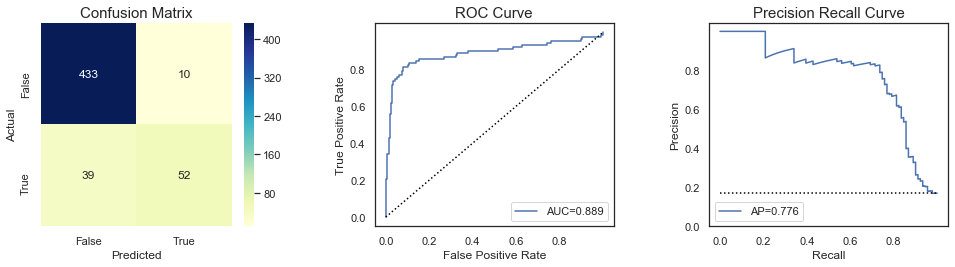

In [39]:
# measure the performance of the model on validation set
get_prediction(svm_model, x_val_scaled, y_val)

## 3.6. Decision Tree

Accuracy: 0.9718574108818011

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1835
           1       1.00      0.80      0.89       297

    accuracy                           0.97      2132
   macro avg       0.98      0.90      0.94      2132
weighted avg       0.97      0.97      0.97      2132




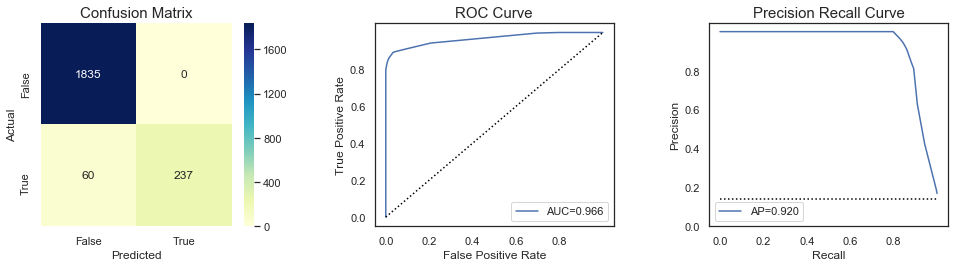

In [40]:
dt_model = tree.DecisionTreeClassifier(max_depth=8, max_features=0.6, random_state=42)
dt_model.fit(x_train, y_train)

get_prediction(dt_model, x_train, y_train)

Accuracy: 0.9176029962546817

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       443
           1       0.86      0.62      0.72        91

    accuracy                           0.92       534
   macro avg       0.89      0.80      0.83       534
weighted avg       0.91      0.92      0.91       534




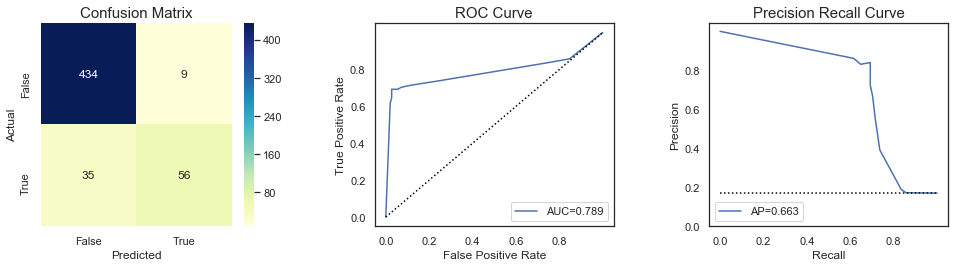

In [41]:
# measure the performance of the model on validation set
get_prediction(dt_model, x_val, y_val)

## 3.7. AdaBoost

Accuracy: 0.9015009380863039

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1835
           1       0.77      0.42      0.54       297

    accuracy                           0.90      2132
   macro avg       0.84      0.70      0.74      2132
weighted avg       0.89      0.90      0.89      2132




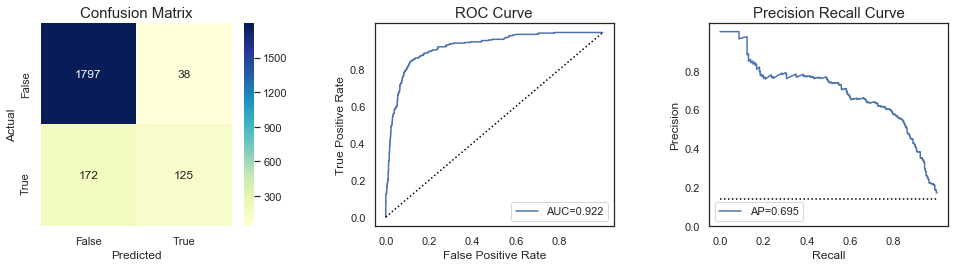

In [42]:
ab_model = ensemble.AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=42)

ab_model.fit(x_train, y_train)

get_prediction(ab_model, x_train, y_train)

Accuracy: 0.8445692883895131

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       443
           1       0.60      0.27      0.38        91

    accuracy                           0.84       534
   macro avg       0.73      0.62      0.64       534
weighted avg       0.82      0.84      0.82       534




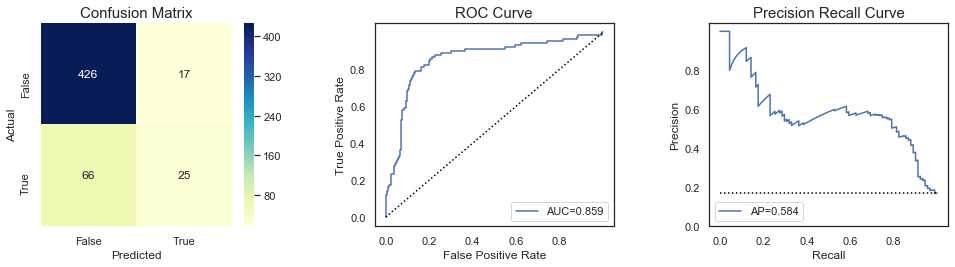

In [43]:
# measure the performance of the model on validation set
get_prediction(ab_model, x_val, y_val)

## 3.8. Gradient Boosting

Accuracy: 0.9798311444652908

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1835
           1       1.00      0.86      0.92       297

    accuracy                           0.98      2132
   macro avg       0.99      0.93      0.96      2132
weighted avg       0.98      0.98      0.98      2132




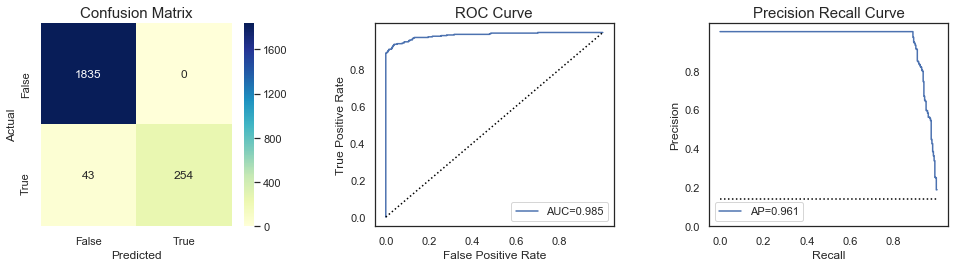

In [44]:
gb_model = ensemble.GradientBoostingClassifier(learning_rate=0.1, n_estimators=150, max_features=0.6, random_state=42)

gb_model.fit(x_train, y_train)

get_prediction(gb_model, x_train, y_train)

Accuracy: 0.9419475655430711

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       443
           1       0.94      0.70      0.81        91

    accuracy                           0.94       534
   macro avg       0.94      0.85      0.89       534
weighted avg       0.94      0.94      0.94       534




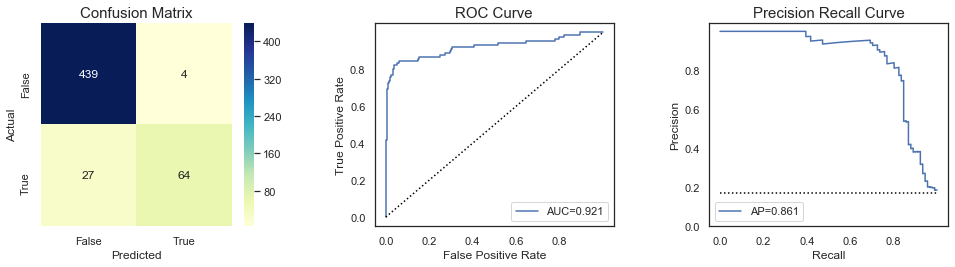

In [45]:
# measure the performance of the model on validation set
get_prediction(gb_model, x_val, y_val)

### 3.9. XGBoost

Accuracy: 0.9807692307692307

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1835
           1       1.00      0.86      0.93       297

    accuracy                           0.98      2132
   macro avg       0.99      0.93      0.96      2132
weighted avg       0.98      0.98      0.98      2132




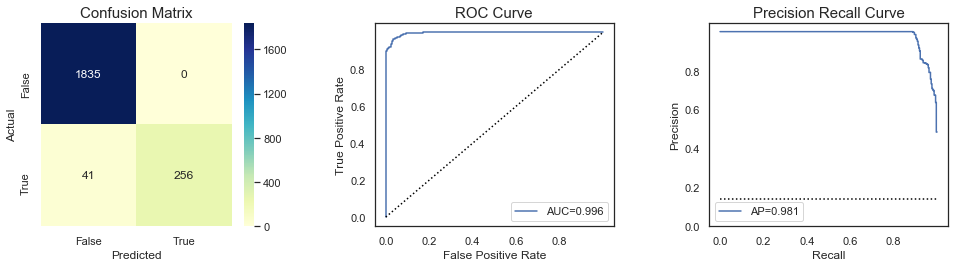

In [46]:
xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=4, random_state=42)

xgb_model.fit(x_train, y_train)

get_prediction(xgb_model, x_train, y_train)

Accuracy: 0.947565543071161

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       443
           1       0.94      0.74      0.83        91

    accuracy                           0.95       534
   macro avg       0.95      0.86      0.90       534
weighted avg       0.95      0.95      0.94       534




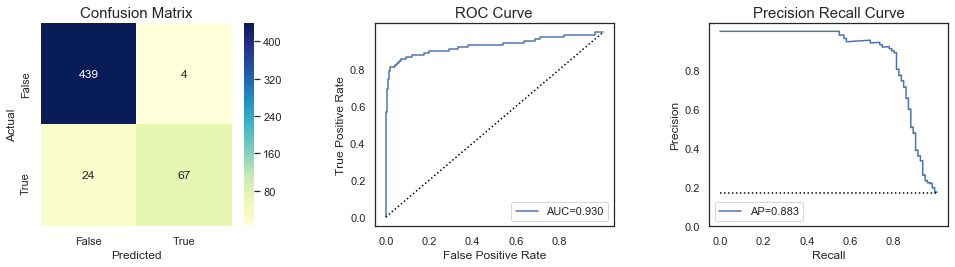

In [47]:
# measure the performance of the model on validation set
get_prediction(xgb_model, x_val, y_val)

## 3.10. Multi-Layer Perceptron

Accuracy: 0.9587242026266416

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1835
           1       0.93      0.76      0.84       297

    accuracy                           0.96      2132
   macro avg       0.95      0.88      0.91      2132
weighted avg       0.96      0.96      0.96      2132




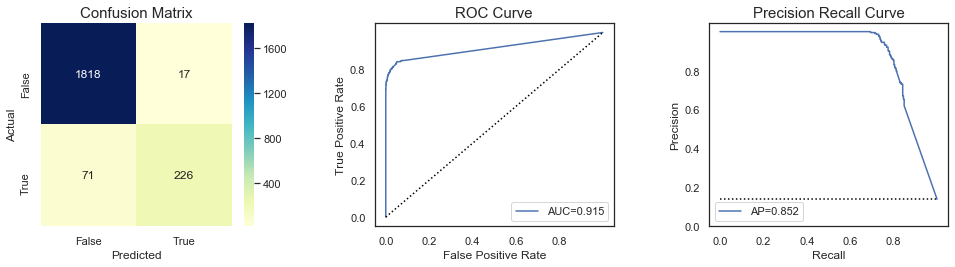

In [48]:
mlp_model = neural_network.MLPClassifier(hidden_layer_sizes=[4, 3], alpha=0.01, learning_rate_init=0.01, random_state=42)

mlp_model.fit(x_train_scaled, y_train)

get_prediction(mlp_model, x_train_scaled, y_train)

Accuracy: 0.9363295880149812

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       443
           1       0.93      0.68      0.78        91

    accuracy                           0.94       534
   macro avg       0.93      0.84      0.87       534
weighted avg       0.94      0.94      0.93       534




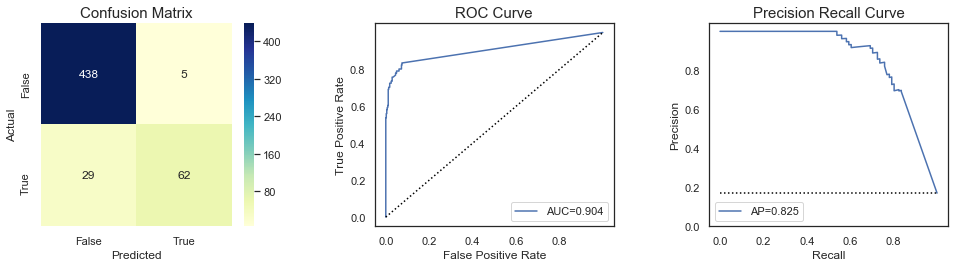

In [49]:
# measure the performance of the model on validation set
get_prediction(mlp_model, x_val_scaled, y_val)

In [50]:
# current loss computed from the loss function
mlp_model.loss_

0.15148264419057372

In [51]:
# weight of each synapse in the network
mlp_model.coefs_

[array([[ 1.94597808, -1.59489272,  0.11421797, -1.85576221],
        [-0.33274005, -0.5513242 , -1.17145973, -0.50319632],
        [-0.25582619,  1.03931919, -1.74040274,  0.51176398],
        [ 0.92933717, -0.7756791 ,  0.10489759, -0.85900559],
        [ 0.12776435, -0.48218028,  0.04624181, -0.02567896],
        [ 0.00339657,  0.43327345, -0.02982563, -0.24639176],
        [-1.69914315,  0.15544142, -0.03066719,  0.14535099],
        [ 0.48713691, -0.53015806, -0.00876643, -0.64856424]]),
 array([[-0.06675892, -0.1490525 ,  3.44034263],
        [-1.10317684, -0.65146924, -0.45925047],
        [-4.13462313,  0.23413197, -1.18978935],
        [ 0.95306205, -0.2160432 , -0.41537617]]),
 array([[3.52427256],
        [0.62233455],
        [2.85539976]])]

In [52]:
# bias added to the output in each node
mlp_model.intercepts_

[array([-2.96132106, -0.04482077,  1.86149362,  1.91427128]),
 array([ 0.54895814, -0.99792592,  0.02836032]),
 array([-3.49869085])]

# 4. Apply Models to Testing Set

## 4.1. Random Forest

Accuracy: 0.9460269865067467

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       572
           1       0.92      0.68      0.78        95

    accuracy                           0.95       667
   macro avg       0.93      0.84      0.88       667
weighted avg       0.94      0.95      0.94       667




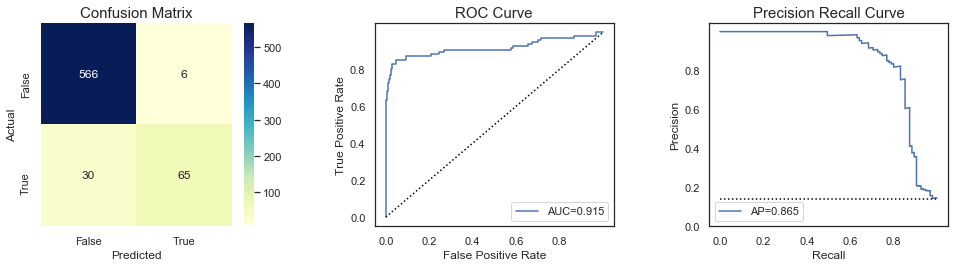

In [53]:
get_prediction(rf_model, x_test, y_test)

## 4.2. k-Nearest Neighbor

Accuracy: 0.9025487256371814

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       572
           1       0.79      0.43      0.56        95

    accuracy                           0.90       667
   macro avg       0.85      0.71      0.75       667
weighted avg       0.89      0.90      0.89       667




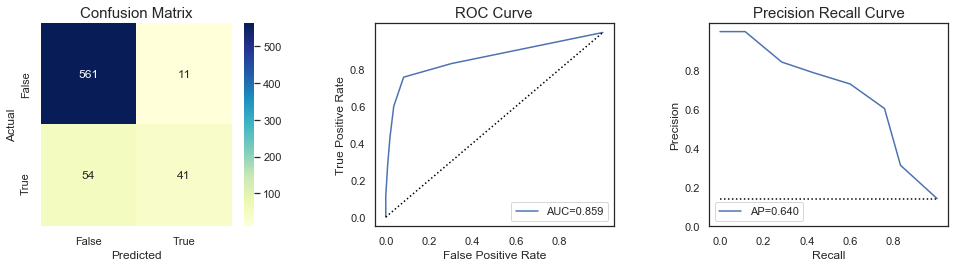

In [54]:
get_prediction(knn_model, x_test_scaled, y_test)

## 4.3. Naive Bayes

Accuracy: 0.841079460269865

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       572
           1       0.43      0.35      0.38        95

    accuracy                           0.84       667
   macro avg       0.66      0.64      0.65       667
weighted avg       0.83      0.84      0.83       667




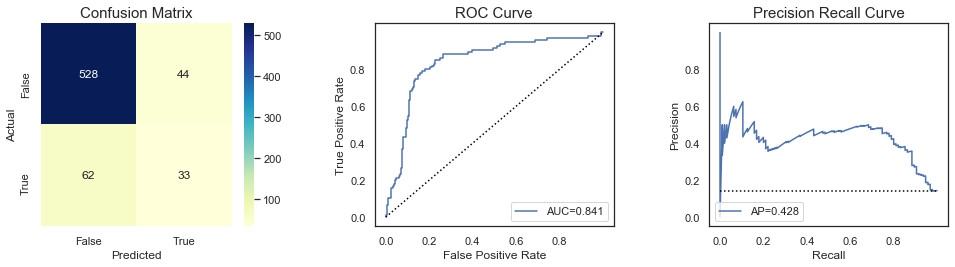

In [55]:
get_prediction(nb_model, x_test, y_test)

## 4.4. Logistic Regression

Accuracy: 0.856071964017991

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       572
           1       0.49      0.21      0.29        95

    accuracy                           0.86       667
   macro avg       0.68      0.59      0.61       667
weighted avg       0.82      0.86      0.83       667




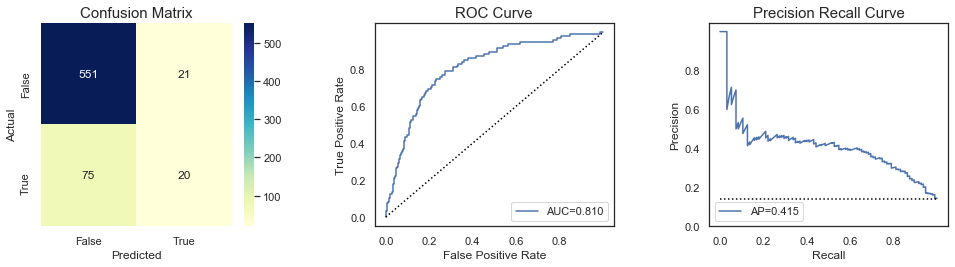

In [56]:
get_prediction(lr_model, x_test_scaled, y_test)

## 4.5. Support Vector Machines

Accuracy: 0.9355322338830585

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       572
           1       0.92      0.60      0.73        95

    accuracy                           0.94       667
   macro avg       0.93      0.80      0.84       667
weighted avg       0.93      0.94      0.93       667




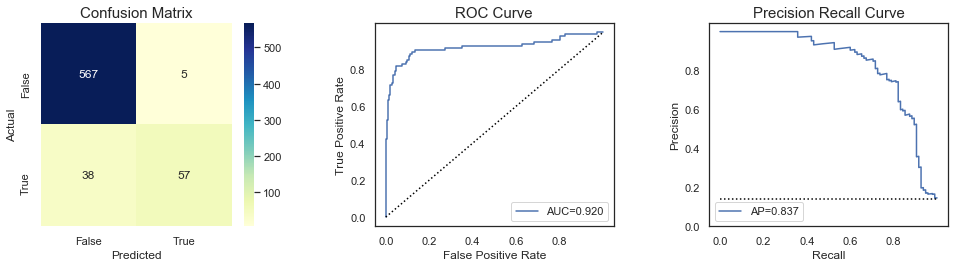

In [57]:
get_prediction(svm_model, x_test_scaled, y_test)

## 4.6. Decision Tree

Accuracy: 0.9310344827586207

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       572
           1       0.83      0.65      0.73        95

    accuracy                           0.93       667
   macro avg       0.89      0.81      0.84       667
weighted avg       0.93      0.93      0.93       667




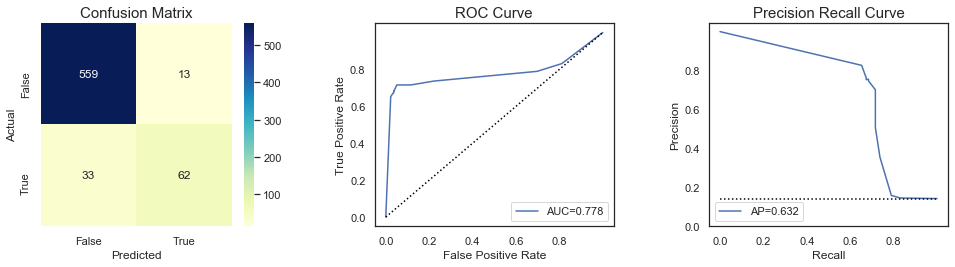

In [58]:
get_prediction(dt_model, x_test, y_test)

## 4.7. AdaBoost

Accuracy: 0.8845577211394303

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       572
           1       0.67      0.37      0.48        95

    accuracy                           0.88       667
   macro avg       0.79      0.67      0.71       667
weighted avg       0.87      0.88      0.87       667




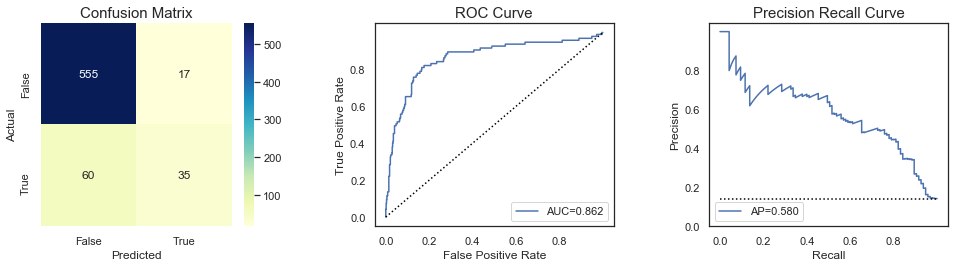

In [59]:
get_prediction(ab_model, x_test, y_test)

## 4.8. Gradient Boosting

Accuracy: 0.952023988005997

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       572
           1       0.96      0.69      0.80        95

    accuracy                           0.95       667
   macro avg       0.95      0.84      0.89       667
weighted avg       0.95      0.95      0.95       667




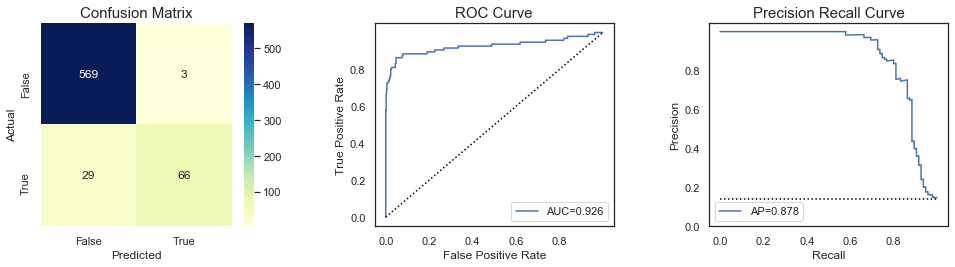

In [60]:
get_prediction(gb_model, x_test, y_test)

## 4.9. XGBoost

Accuracy: 0.9550224887556222

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       572
           1       0.93      0.74      0.82        95

    accuracy                           0.96       667
   macro avg       0.95      0.86      0.90       667
weighted avg       0.95      0.96      0.95       667




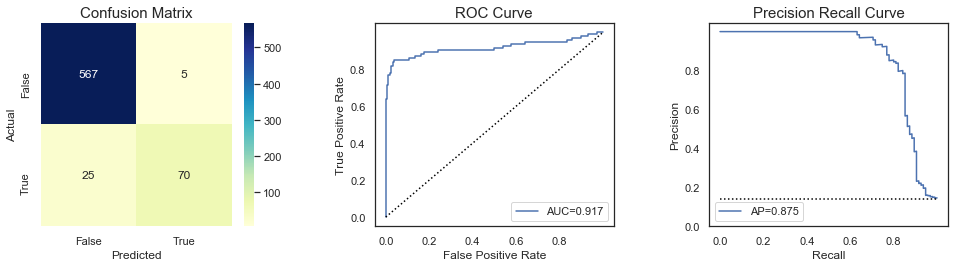

In [61]:
get_prediction(xgb_model, x_test, y_test)

## 4.10. Multi-Layer Perceptron

Accuracy: 0.952023988005997

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       572
           1       0.94      0.71      0.81        95

    accuracy                           0.95       667
   macro avg       0.95      0.85      0.89       667
weighted avg       0.95      0.95      0.95       667




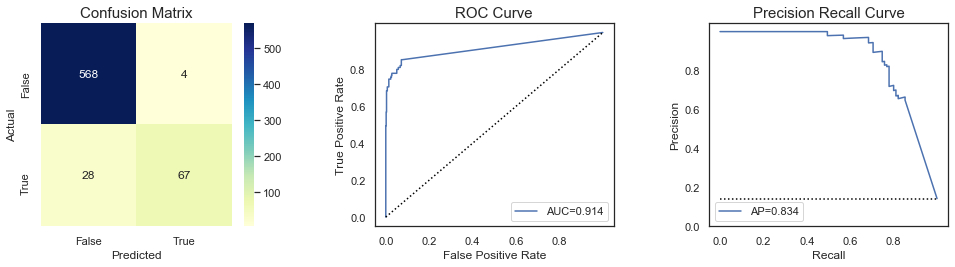

In [62]:
get_prediction(mlp_model, x_test_scaled, y_test)

# 5. Results

In [63]:
def plot_curves(type):
    if type not in ('roc', 'prc'):
        raise Exception('Invalid plot type')

    train_parameters = train_roc_param if type=='roc' else train_prc_param
    test_parameters = test_roc_param if type=='roc' else test_prc_param
    metric = 'AUC' if type=='roc' else 'AP'
    x_label = 'False Positive Rate' if type=='roc' else 'Recall'
    y_label = 'True Positive Rate' if type=='roc' else 'Precision'
    legend_pos = 'lower right' if type=='roc' else 'lower left'

    # small subplots for each classifier
    fig, axes = plt.subplots(nrows=len(train_parameters), ncols=2, figsize=(12, 54))
    plt.subplots_adjust(left=0.06, right=0.9, bottom=0.01, top=0.8, wspace=0.5, hspace=0.3)

    # larger subplots with input from all classifiers
    fig2, axes2 = plt.subplots(nrows=2, ncols=1, figsize=(7, 13))
    plt.subplots_adjust(left=0.06, right=0.9, bottom=0.01, top=0.9, wspace=0.2, hspace=0.2)

    # construct plots for each classifier using parameters stored in the dictionaries
    for i, value in enumerate(train_parameters.keys()):
        axes[i, 0].plot(train_parameters[value][0], train_parameters[value][1], 
                        label='{}={:.3f}'.format(metric, train_parameters[value][3]))
        if type=='roc':
            axes[i, 0].plot([0,1], [0,1], linestyle="dotted", color="black") 
        else:
            axes[i, 0].plot([0,1], [train_parameters[value][4], train_parameters[value][4]], linestyle="dotted", color="black")
        axes[i, 0].set_title('{} on Training Data'.format(value), fontsize=15)
        axes[i, 0].set_xlabel(x_label)
        axes[i, 0].set_ylabel(y_label)
        axes[i, 0].set_xticks(np.arange(0, 1, 0.2))
        axes[i, 0].set_yticks(np.arange(0, 1, 0.2))
        axes[i, 0].legend(loc=legend_pos)

        axes[i, 1].plot(test_parameters[value][0], test_parameters[value][1], 
                        label='{}={:.3f}'.format(metric, test_parameters[value][3]))
        if type=='roc':
            axes[i, 1].plot([0,1], [0,1], linestyle="dotted", color="black")
        else:
            axes[i, 1].plot([0,1], [test_parameters[value][4], test_parameters[value][4]], linestyle="dotted", color="black")
        axes[i, 1].set_title('{} on Testing Data'.format(value), fontsize=15)
        axes[i, 1].set_xlabel(x_label)
        axes[i, 1].set_ylabel(y_label)
        axes[i, 1].set_xticks(np.arange(0, 1, 0.2))
        axes[i, 1].set_yticks(np.arange(0, 1, 0.2))
        axes[i, 1].legend(loc=legend_pos)

        axes2[0].plot(train_parameters[value][0], train_parameters[value][1], linewidth=2.5,
                         label='{}: {}={:.3f}'.format(value, metric, train_parameters[value][3]))
        axes2[1].plot(test_parameters[value][0], test_parameters[value][1], linewidth=2.5,
                         label='{}: {}={:.3f}'.format(value, metric, test_parameters[value][3]))
        if type=='prc':
            axes2[0].plot([0,1], [train_parameters[value][4], train_parameters[value][4]], linestyle="dotted", color="black")
            axes2[1].plot([0,1], [test_parameters[value][4], test_parameters[value][4]], linestyle="dotted", color="black")

    for i in range(2):
        dataset = 'Training Data' if i==0 else 'Testing Data'
        if type=='roc':
            axes2[i].plot([0,1], [0,1], linestyle="dotted", color="black")
        axes2[i].set_title('All Models on {}'.format(dataset), fontsize=18)
        axes2[i].set_xlabel(x_label, fontsize=12)
        axes2[i].set_ylabel(y_label, fontsize=12)
        axes2[i].set_xticks(np.arange(0, 1, 0.2))
        axes2[i].set_yticks(np.arange(0, 1, 0.2))
        axes2[i].xaxis.set_tick_params(labelsize=10)
        axes2[i].yaxis.set_tick_params(labelsize=10)
        axes2[i].legend(bbox_to_anchor=(1.05, 0.9), fontsize=13)

## 5.1. Performance Metrics

### Training Data

In [64]:
train_result_df = pd.DataFrame.from_dict(train_accs, orient='index', columns=['Accuracy'])

train_result_df['Precision'], train_result_df['Recall'], train_result_df['f1-score'] = [train_precision.values(), 
                                                                                        train_recall.values(), 
                                                                                        train_f1score.values()]
train_result_df

,Accuracy,Precision,Recall,f1-score
RandomForestClassifier,0.975141,0.995935,0.824916,0.902394
KNeighborsClassifier,0.933396,0.937853,0.558923,0.700422
GaussianNB,0.854597,0.475836,0.430976,0.452297
LogisticRegression,0.868199,0.570175,0.218855,0.316302
SVC,0.961538,0.961373,0.754209,0.845283
DecisionTreeClassifier,0.971857,1.000000,0.797980,0.887640
AdaBoostClassifier,0.901501,0.766871,0.420875,0.543478
GradientBoostingClassifier,0.979831,1.000000,0.855219,0.921960
XGBClassifier,0.980769,1.000000,0.861953,0.925859
MLPClassifier,0.958724,0.930041,0.760943,0.837037


### Testing Data

In [65]:
test_result_df = pd.DataFrame.from_dict(test_accs, orient='index', columns=['Accuracy'])

test_result_df['Precision'], test_result_df['Recall'], test_result_df['f1-score'] = [test_precision.values(), 
                                                                                     test_recall.values(), 
                                                                                     test_f1score.values()]

test_result_df

,Accuracy,Precision,Recall,f1-score
RandomForestClassifier,0.946027,0.915493,0.684211,0.783133
KNeighborsClassifier,0.902549,0.788462,0.431579,0.557823
GaussianNB,0.841079,0.428571,0.347368,0.383721
LogisticRegression,0.856072,0.487805,0.210526,0.294118
SVC,0.935532,0.919355,0.600000,0.726115
DecisionTreeClassifier,0.931034,0.826667,0.652632,0.729412
AdaBoostClassifier,0.884558,0.673077,0.368421,0.476190
GradientBoostingClassifier,0.952024,0.956522,0.694737,0.804878
XGBClassifier,0.955022,0.933333,0.736842,0.823529
MLPClassifier,0.952024,0.943662,0.705263,0.807229


## 5.2. Confusion Matrices

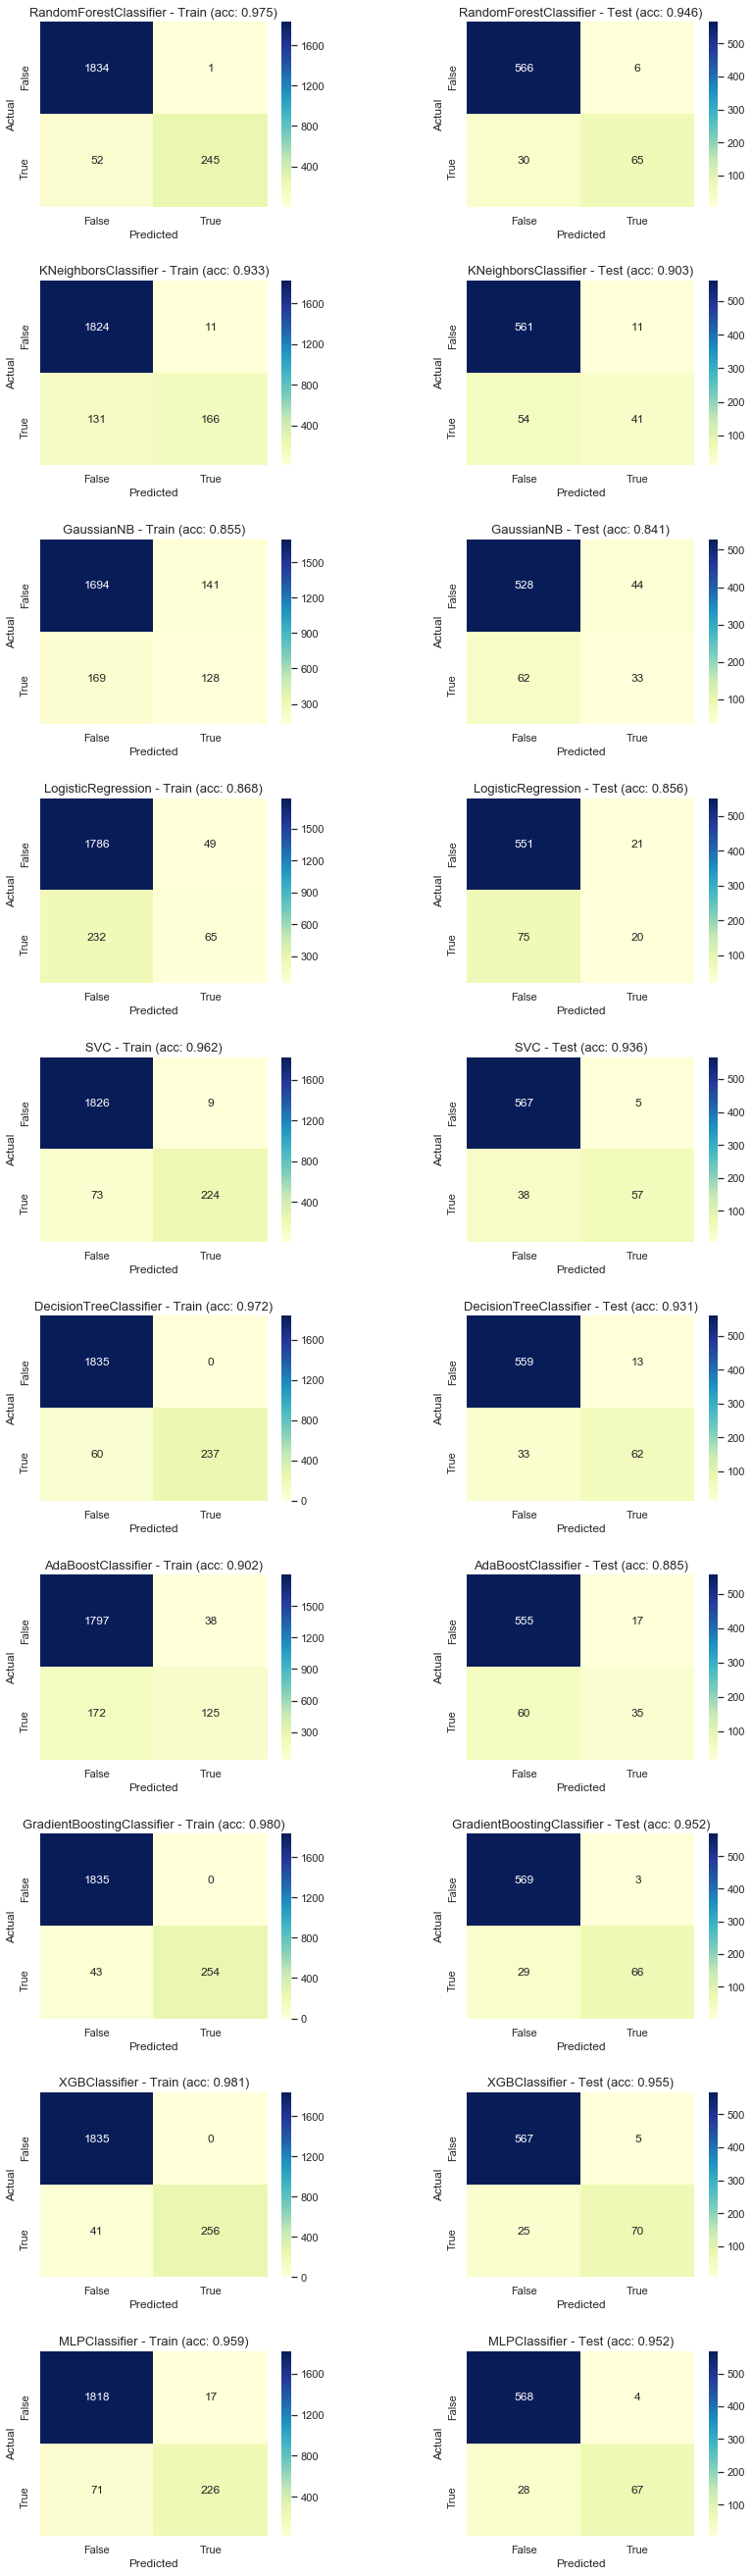

In [66]:
fig, axes = plt.subplots(nrows=len(train_conf_mat), ncols=2, figsize=(12, 40))
plt.subplots_adjust(left=0.06, right=0.9, bottom=0.01, top=0.9, wspace=0.5, hspace=0.4)

for i, value in enumerate(train_conf_mat.keys()):   
    sns.heatmap(train_conf_mat[value], annot=True, cmap='YlGnBu', fmt='g', ax=axes[i, 0])
    axes[i, 0].set_title('{} - Train (acc: {:.3f})'.format(value, train_accs[value]), fontsize=13)
    axes[i, 0].set_xlabel('Predicted')
    axes[i, 0].set_ylabel('Actual')
    
    sns.heatmap(test_conf_mat[value], annot=True, cmap='YlGnBu', fmt='g', ax=axes[i, 1])
    axes[i, 1].set_title('{} - Test (acc: {:.3f})'.format(value, test_accs[value]), fontsize=13)
    axes[i, 1].set_xlabel('Predicted')
    axes[i, 1].set_ylabel('Actual')

## 5.3. Receiver Operating Characteristic Curves

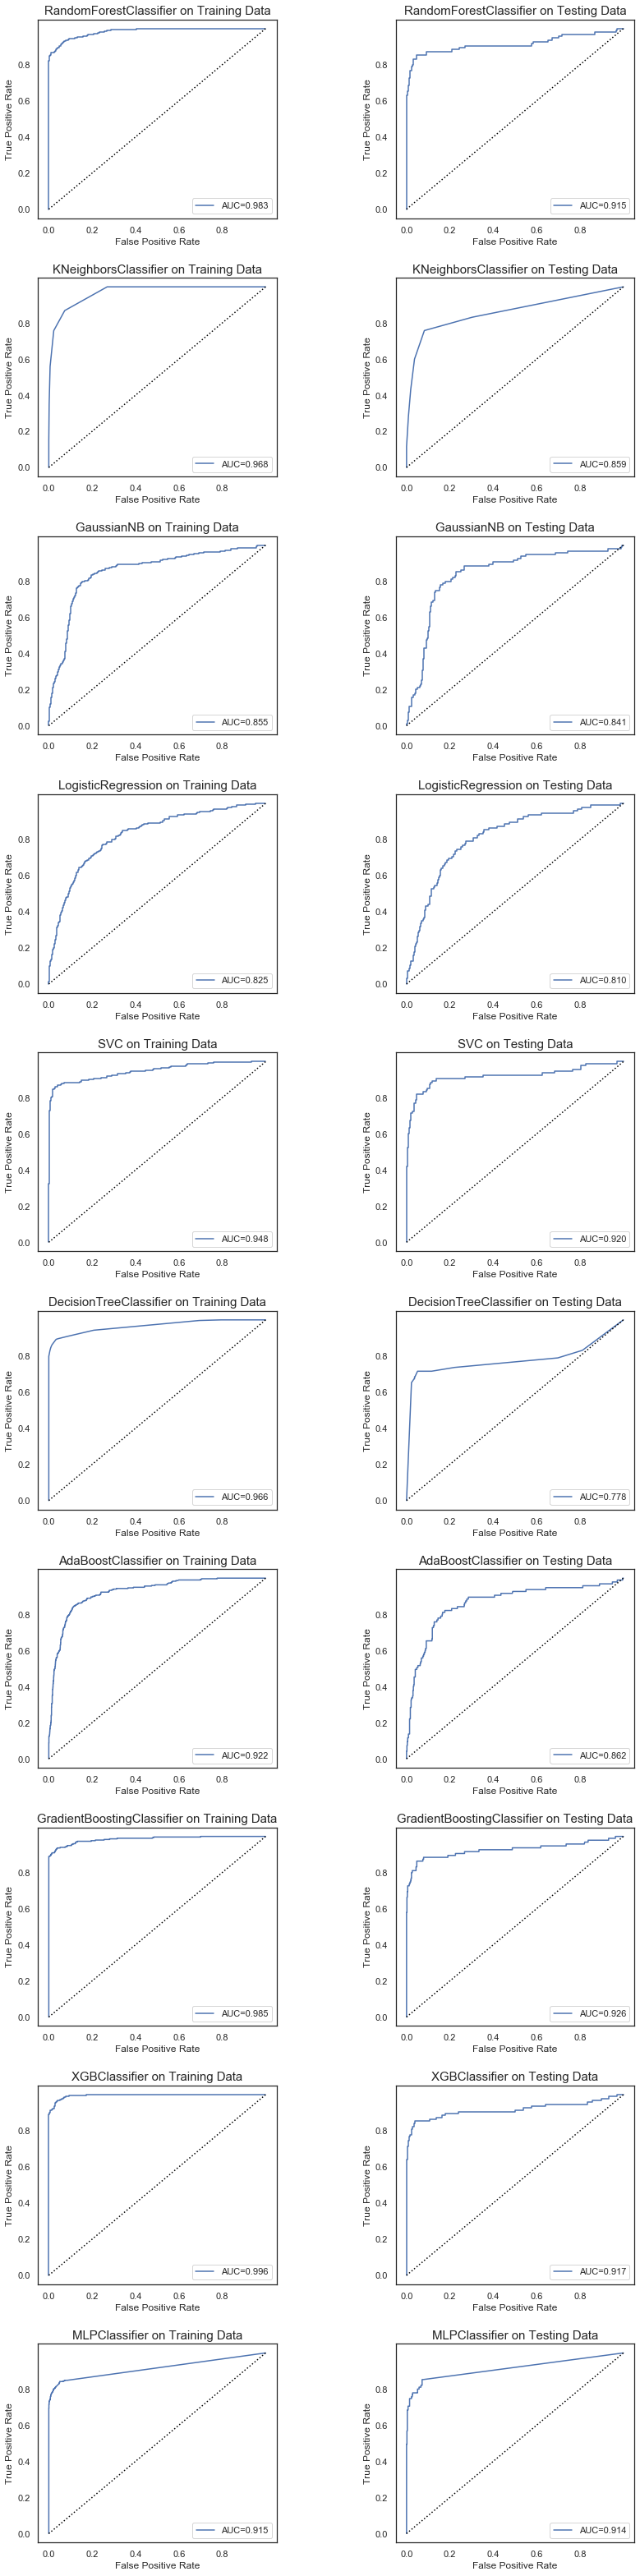

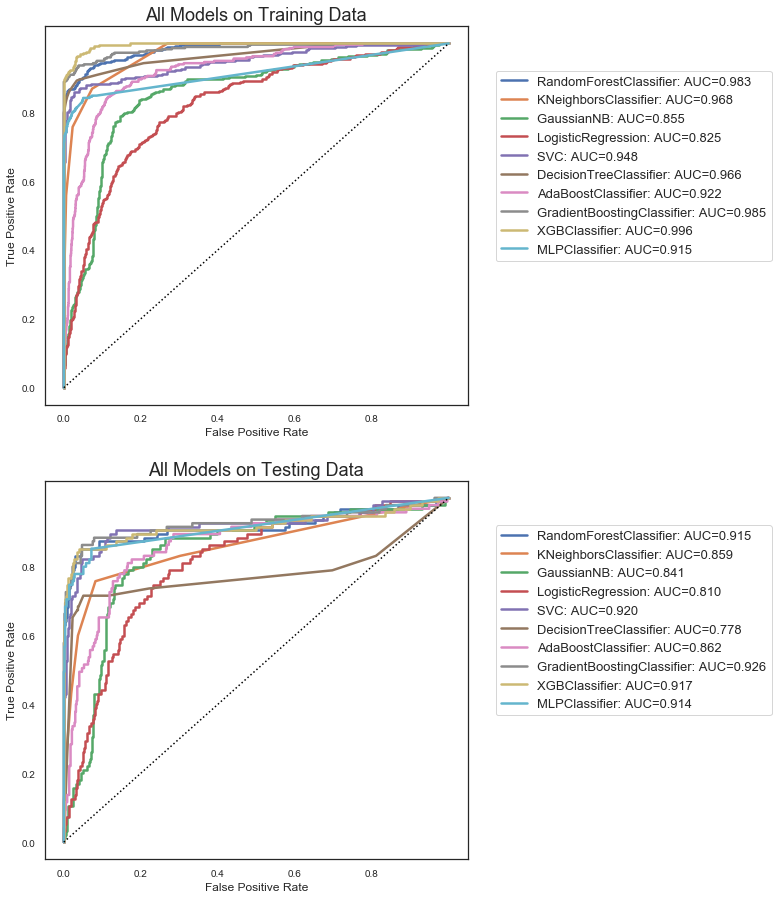

In [67]:
plot_curves('roc')

## 5.4. Precision Recall Curves 

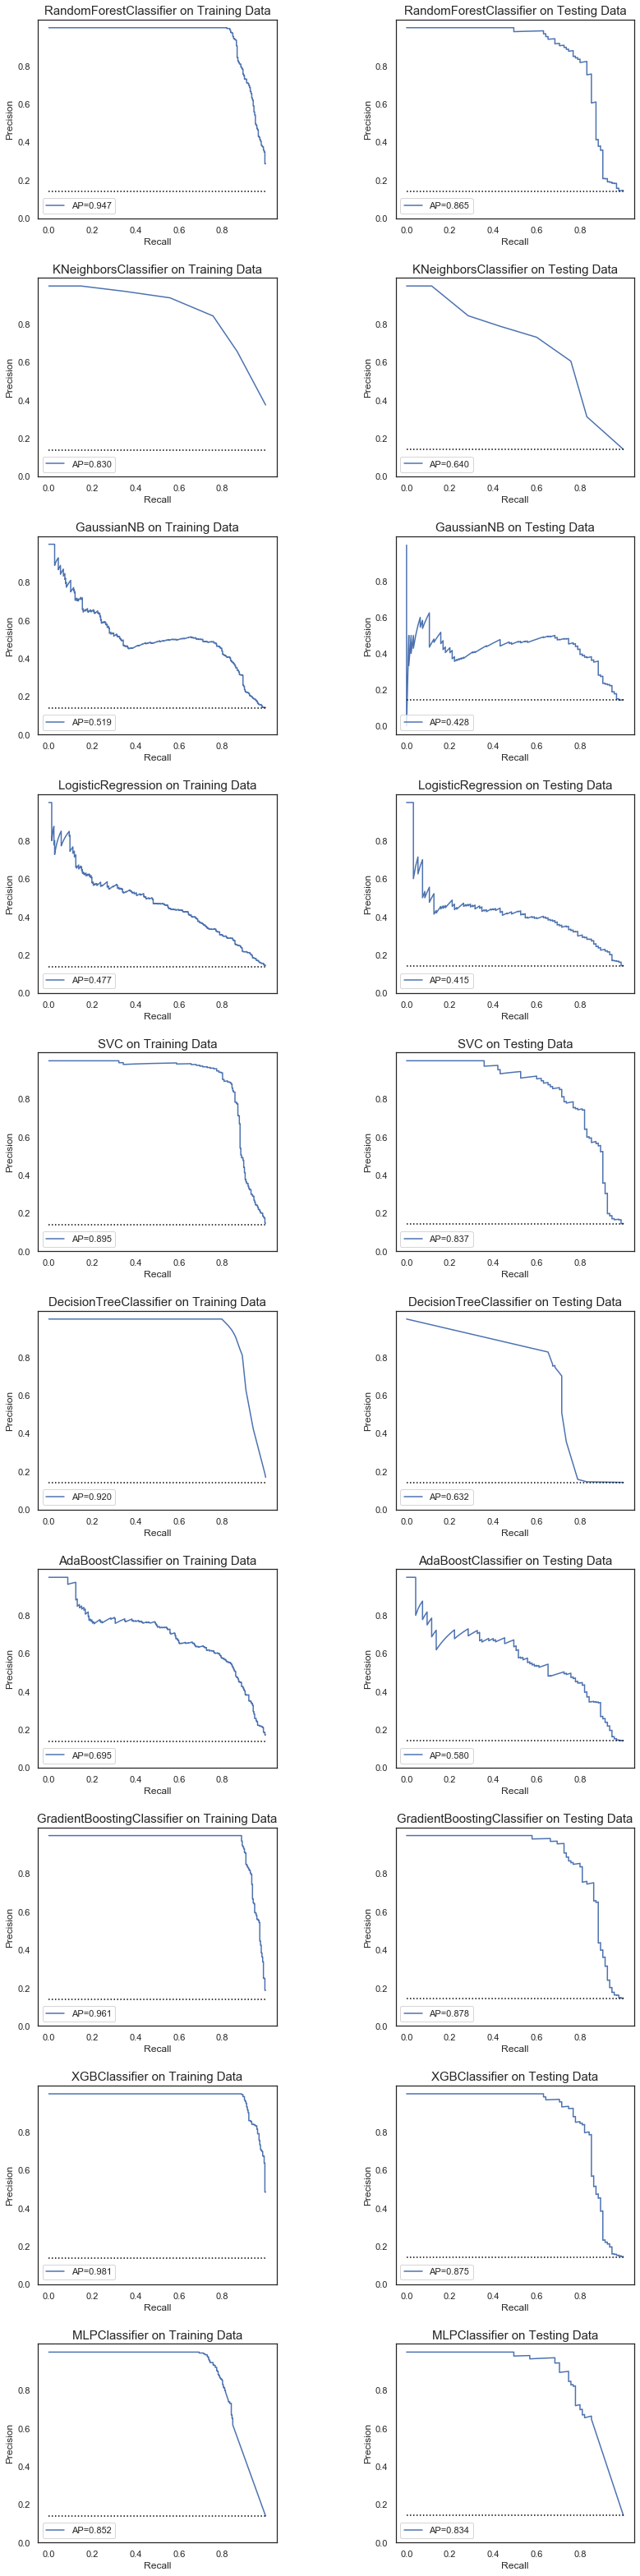

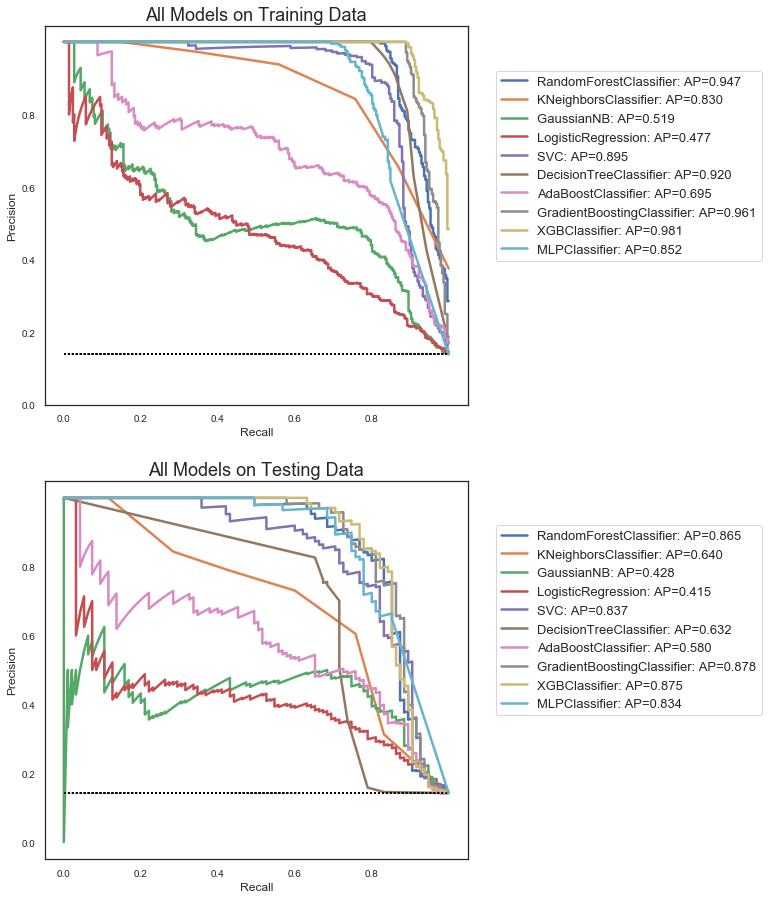

In [68]:
plot_curves('prc')